# Evaluating Numerical Expressions

using stacks to implement an algorithm that can evaluate numerical expressions.

Calculating the result of a complex numerical expression isn't something that a computer processor can do right out of the box. Behind the scenes, Python uses an algorithm to evaluate such expression.

The aim of project is to use the stack data structure that to implement an algorithm that can evaluate complex numerical expressions.

### Importing the LinkedList and Stack

In [1]:
from linked_list import LinkedList

class Stack(LinkedList):
    
    def push(self, data):
        self.append(data)

    def peek(self):
        return self.tail.data

    def pop(self):
        ret = self.tail.data
        if self.length == 1:
            self.tail = self.head = None
        else:
            self.tail = self.tail.prev
            self.tail.next = None
        self.length -= 1
        return ret

### Infix and Postfix Notation

When we write an expression, we use infix notation, meaning that we put the operators between the two operands. For example 1 + 2 is in infix notation because the + operator is between the operands 1 and 2.

For a computer, it's much easier to evaluate an expression written in postfix notation. In postfix notation, the operands appear before the operator. The infix expression 1 + 2 becomes 1 2 + in postfix notation.

We can evaluate an expression in postfix notation using a stack. We read the expression from left to right and do the following:

If we find a number, we push that number to the top of the stack.

If we find an operator, we pop the top two elements of the stack, perform the operation, and then push back the result.

After processing the entire expression, there will be a single element on the stack. This value is the result of the operation.

Let's see how the algorithm evaluates the expression 12 2 4 + / 21 *:
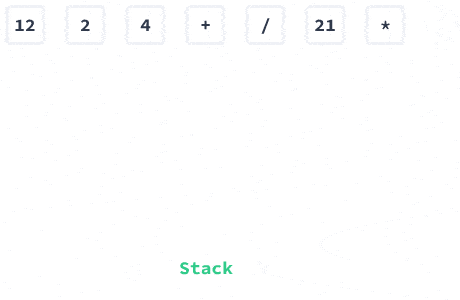


### Implementing the tokenize function

In [2]:
def tokenize(expression):
    return expression.split()

print(tokenize("12 2 4 + / 21 *"))

['12', '2', '4', '+', '/', '21', '*']


### Functions to process operators in postfix evaluation

we learned that we can evaluate an expression in postfix notation using a stack. The idea is that we read the expression from left to right and do the following:

If we find a number, then we push that number to the top of the stack.

If we find an operator, we pop the top two elements of the stack, perform the operation, and then push back the result.

There is one important detail we need to consider in the second step. When we find an operator, we pop the top two values on the top of the stack. When we apply the operator to those two elements, we need to make sure we operate those two numbers in the correct order.

Consider the expression 1 - 2. We need to subtract 2 from 1 and not the other way around. The element at the top of the stack is actually the second operand in the expression, while the element that is second to top is the first operand:

The functions are all the same, the only thing that changes is the operator used to calculate the result variable.

It is very important to perform the operation between the elements that was second to to and the top elements. If we do it the other way around we'll get the wrong result.

For example, in the process_minus() function we do:

result = second_to_top - top # Correct
and not

result = top - second_to_top # Wrong

In [3]:

def process_minus(stack):
    top = stack.pop()
    second_to_top = stack.pop()
    result = second_to_top - top
    stack.push(result)
    
def process_plus(stack):
    top = stack.pop()
    second_to_top = stack.pop()
    # Same as process_minus but with + instead of -
    result = second_to_top + top
    stack.push(result)
    
def process_times(stack):
    top = stack.pop()
    second_to_top = stack.pop()
    # Same as process_minus but with * instead of -
    result = second_to_top * top
    stack.push(result)

def process_divide(stack):
    top = stack.pop()
    second_to_top = stack.pop()
    # Same as process_minus but with / instead of -
    result = second_to_top / top
    stack.push(result)
    
def process_pow(stack):
    top = stack.pop()
    second_to_top = stack.pop()
    # Same as process_minus but with ** instead of -
    result = second_to_top ** top
    stack.push(result)

### Evaluating postfix expressions

Here are the steps we need to follow to implement the evaluate_postfix() function.

Initialize an empty stack.

Tokenize the expression using the tokenize() function.

For each token, do:
    
If the token an operator, call the corresponding function to process it. For example, if we find a + we call the process_plus() function.

Otherwise (the token is a number) and we push that number to the top of the stack. Since each token is a string, we'll need to convert it to a float first.

Return the value that is left in the stack.

In [4]:
def evaluate_postfix(expression):
    tokens = tokenize(expression)
    stack = Stack()
    for token in tokens:
        if token == "+":
            process_plus(stack)
        elif token == "-":
            process_minus(stack)
        elif token == "*":
            process_times(stack)
        elif token == "/":
            process_divide(stack)
        elif token == "**":
            process_pow(stack)
        else:
            # The token is not an operator so it must be a number
            stack.push(float(token))
    return stack.pop()

### Testing the implementation

When testing with other expressions we need to add spaces between at two tokens. For example 1 + 3 will work but 1+3 won't.

In [5]:
expressions = [
    "4 6 -",
    "4 1 2 9 3 / * + 5 - *",
    "1 2 + 3 -",
    "1 2 - 3 +",
    "10 3 5 * 16 4 - / +",
    "5 3 4 2 - ** *",
    "12 2 4 + / 21 *",
    "1 1 + 2 **",
    "1 1 2 ** +"
]

for expression in expressions:
    print(evaluate_postfix(expression))

-2.0
8.0
0.0
2.0
11.25
45.0
42.0
4.0
2.0


### Operator Precedence in Infix Notation

We can now evaluate postfix expressions! But to make this project useful, we need to enable our algorithm to evaluate expressions in infix notation. After all, it would be very annoying to have to write expressions in postfix notation to use our algorithm.

Like before, to simplify tokenizing the expression, we'll assume that the infix expression string contains spaces between any two tokens (even the parentheses).

This means that we can tokenize the expression using the tokenize() function we implemented before:

To convert an expression from infix to postfix, we'll implement the Shunting-yard algorithm. The data structure to implement this algorithm is (again) a stack.

We need to do some prep work before we start describing and implementing the algorithm.In an expression in infix notation, the operation precedence rules define the order in which we perform the operations. For example, in the expression 4 + 2 * 3, we first need to perform the multiplication and only then the addition:

If operators have the same precedence, they are evaluated in the order they appear. For example, in 1 - 2 + 3, we do - and then +, but in 1 + 2 - 3, we do + and then -.

In short, the + and - have the same precedence, the * and / have the same precedence and higher precedence than + and -, and the ** has the highest precedence of all.

In the Shunting-yard algorithm, we'll need to compare the precedence of the operators. We will use numbers to represent the operator precedence. The higher the precedence, the higher the number. 

### Precedence dictionary

The precedence dictionary is used to compare the precedence of two operators.

In [6]:
precedence = {
    "+": 1,
    "-": 1,
    "*": 2,
    "/": 2,
    "**": 3
}

print(precedence["/"] < precedence["-"])
print(precedence["+"] < precedence["*"])
print(precedence["+"] < precedence["-"])
print(precedence["/"] < precedence["**"])

False
True
False
True


### Processing tokens in infix to postfix conversions

we'll implement a function infix_to_postfix() that, given a string with an expression in infix notation, outputs a string with that expression written in postfix notation.

This function will implement the Shunting-yard algorithm. This algorithm is similar to the evaluate_postfix() function we've implemented before. It starts by tokenizing the postfix expression, and then it processes the tokens one by one using a stack. It builds the postfix expression by keeping track of a list named postfix, which will contain the list of tokens in postfix order.

Here's how processing should go for each token:

#### 1. Opening parentheses, (:

Push the token into the stack. It will be used later when we find a closing parenthesis.

In [8]:
def process_opening_parenthesis(stack):
    stack.push("(")

#### 2. Closing parentheses ):

While the top of the stack is not an opening parenthesis, (, pop the top element and append it to the postfix token list.
Pop the opening parentheses out of the stack at the end.

In [9]:
def process_closing_parenthesis(stack, postfix):
    # Add tokens until we find the open bracket
    while stack.peek() != "(":
        postfix.append(stack.pop())
    # Remove the opening bracket
    stack.pop()

#### 3. Operator, +, -, *, / or **:
    
While the top of the stack is also an operator whose precedence is greater than or equal to this operator, pop the top element and append it to the postfix token list.

Push the current operator to the top of the stack.

The Stack.peek() method will cause an error if the stack is empty. Thus, in the while loop we also need to check that the stack is not empty.

In [10]:
def process_operator(stack, postfix, operator):
    while len(stack) > 0 and stack.peek() in precedence and precedence[stack.peek()] >= precedence[operator]:
        postfix.append(stack.pop())
    stack.push(operator)

#### 4. Operand (any number):

Push(append) the token into the the postfix token list.

In [11]:
def process_number(postfix, number):
    postfix.append(number)

### The Shunting-yard Algorithm

This function will work as follows: 

1. We start by splitting the expression into tokens using the tokenize() function.

2. We initialize an empty stack.

3. We initialize and empty postfix token list.

4. Iterate over all tokens and for each of them:
    
 -If the token is "(" we call the process_opening_parenthesis() function.

 -If the token is ")" we call the process_closing_parenthesis() function.

 -If the token is an operator we call the process_operator() function.

 -Otherwise, the token is a number and we call the process_number() function.

5. After processing all tokens, we use a while loop to pop the remaining stack element into the postfix token list.

6. Use the str.join() method to convert the postfix token list into a string.

In [12]:
def infix_to_postfix(expression):
    tokens = tokenize(expression)
    stack = Stack()
    postfix = []
    for token in tokens:
        if token == "(":
            process_opening_parenthesis(stack)
        elif token == ")":
            process_closing_parenthesis(stack, postfix)
        elif token in precedence:
            process_operator(stack, postfix, token)
        else:
            process_number(postfix, token)
    while len(stack) > 0:
        postfix.append(stack.pop())
    return " ".join(postfix)

### Evaluating Infix Expressions

We now have a function that can transform an infix expression into postfix notation and a function that can evaluate an expression in postfix notation. By combining the two, we can write a function named evaluate() that returns the value of an expression in infix notation.

In [13]:
def evaluate(expression):
    postfix_expression = infix_to_postfix(expression)
    return evaluate_postfix(postfix_expression)

In [14]:
expressions = [
    "1 + 1",
    "1 * ( 2 - ( 1 + 1 ) )",
    "4 * ( 1 + 2 * ( 9 / 3 ) - 5 )",
    "10 + 3 * 5 / ( 16 - 4 * 1 )",
    "2 * 2 * 2 * 2 * 2 * 2 * 2 * 2",
    "2 ** 2 ** 2 ** 2 ** 2",
    "( 1 - 2 ) / ( 3 - 5 )",
    "9 / 8 * 8",
    "64 / ( 8 * 8 )",
]

for expression in expressions:
    print(evaluate(expression))

2.0
0.0
8.0
11.25
256.0
65536.0
0.5
9.0
1.0
